In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Calculating Cosine Similarity between genre
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [3]:
data = pd.read_csv(r"D:\YUKTA\Assignment\DS\Recommendation System\anime.csv")

In [4]:
data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


# EDA:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
data.shape

(12294, 7)

In [7]:
data.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [8]:
data.describe(include='object')

,name,genre,type,episodes
count,12294,12232,12269,12294
unique,12292,3264,6,187
top,Saru Kani Gassen,Hentai,TV,1
freq,2,823,3787,5677


In [9]:
null_counts = data.isnull().sum()
print(null_counts)

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


Null values are observed in the genre, type, and rating columns.

**Handling Missing Values:**

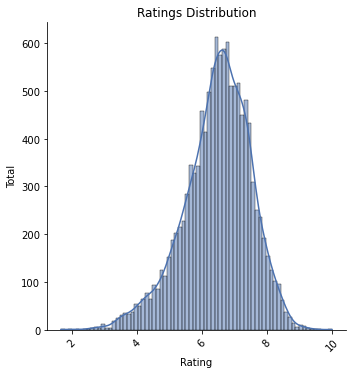

In [10]:
#Plot Rating column
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=data, x='rating',kde=True)

plt.xlabel('Rating')
plt.ylabel('Total')
plt.title('Ratings Distribution')
plt.xticks(rotation=45)

plt.show()

As Rating column is left skweed let's fill the missing values with median intead of mean.

In [11]:
data['rating'].fillna(data['rating'].median(),inplace=True)

Filling the null values in **Type** and **Genre** with mode values:

In [12]:
data['type'].fillna(data['type'].mode()[0],inplace=True)

In [13]:
data['genre'].fillna(data['genre'].mode()[0],inplace=True)

In [14]:
data.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

Thus there are no null values in the dataset

In [15]:
#Check for duplicate values in dataset
data[data.duplicated()].shape[0]

0

In [16]:
#number of unique anime_id in the dataset
len(data.anime_id.unique()) 

12294

In [17]:
#number of unique genre in the dataset
len(data.genre.unique()) 

3264

In [18]:
#number of unique type in the dataset
len(data.type.unique()) 

6

In [19]:
data.type.value_counts()

TV         3812
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

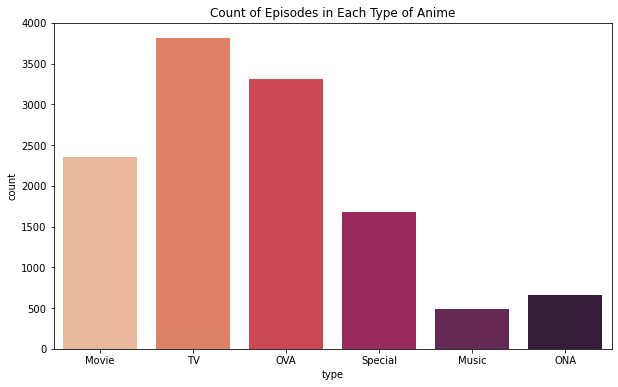

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x="type", data= data, palette = 'rocket_r')
plt.title('Count of Episodes in Each Type of Anime')
plt.show()

Maximum number of anime belong to the type **TV** (3812) followed by **OVA** (3311) which has 2nd largest count.

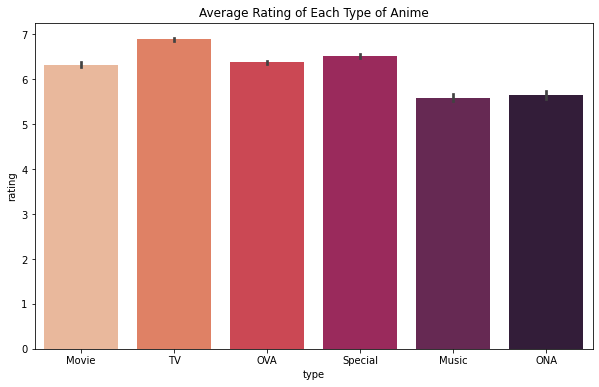

In [21]:
# Bar Plot for the average rating of each type of anime
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='rating', data=data, estimator=lambda x: sum(x) / len(x),
           palette = "rocket_r")
plt.title('Average Rating of Each Type of Anime')
plt.show()

Anime episodes on **TV** has highest average rating

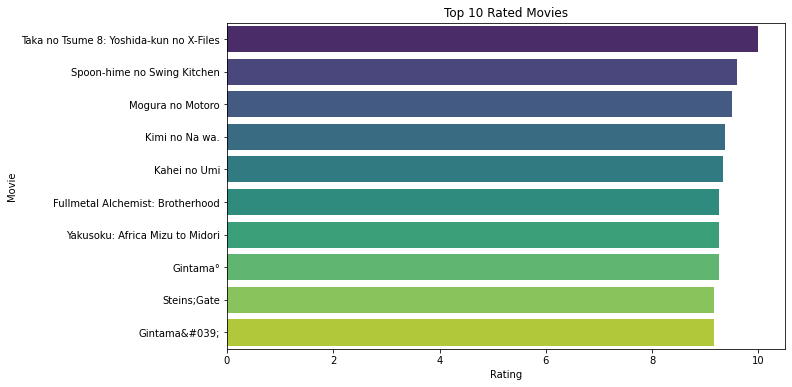

In [22]:
# Bar Plot for the top 10 rated anime
anime = data.sort_values(by='rating',ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='name', data=anime, palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('Top 10 Rated Movies')
plt.show()

Anime **Taka no Tsume 8: Yoshida-kun no X-Files** has highest rating which belongs to type **movie**

In [23]:
# Top Anime by Community

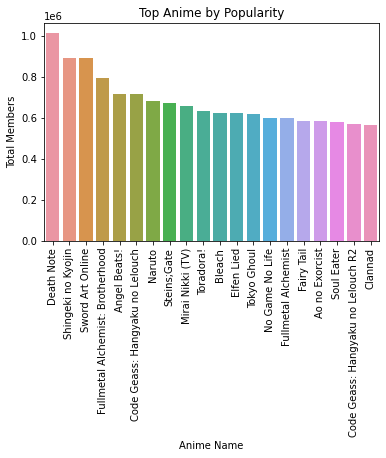

In [24]:
top_anime = data.sort_values(["members"],ascending=False)

sns.barplot(x=top_anime["name"][:20],y=top_anime["members"][:20])
plt.xlabel("Anime Name")
plt.ylabel('Total Members')
plt.title("Top Anime by Popularity")
plt.xticks(rotation=90)

plt.show()

Among the anime titles, **Death Note** has the highest number of community members. It is followed by **Shingeki no Kyojin (Attack on Titan)** and **Sword Art Online**, which also have significant community engagement.

# Recommendation System:

In [25]:
df = pd.DataFrame(data)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
# Convert the genres to a matrix of token counts
count_vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '), token_pattern=None)
genre_matrix = count_vectorizer.fit_transform(df['genre'])

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

In [29]:
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(genre_matrix, genre_matrix)

**Recommendation based on anime names:**

In [30]:

# Function to get recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the anime that matches the title
    idx = df.index[df['name'] == title].tolist()[0]

    # Get the pairwise similarity scores of all animes with that anime
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the anime based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar animes
    sim_scores = sim_scores[1:11]

    # Get the anime indices
    anime_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar animes
    return df['name'].iloc[anime_indices]

In [31]:
# Recommendation for the anime Kimi no Na wa.

recommendations = get_recommendations('Kimi no Na wa.')
print(recommendations)

5805                          Wind: A Breath of Heart OVA
6394                         Wind: A Breath of Heart (TV)
1111                Aura: Maryuuin Kouga Saigo no Tatakai
208                         Kokoro ga Sakebitagatterunda.
504     Clannad: After Story - Mou Hitotsu no Sekai, K...
1201                       Angel Beats!: Another Epilogue
1435                                           True Tears
1436                   &quot;Bungaku Shoujo&quot; Memoire
1494                                             Harmonie
1631                                  Kimikiss Pure Rouge
Name: name, dtype: object


In [32]:
# Recommendation for the anime Death Note

recommendations = get_recommendations('Death Note')
print(recommendations)

778                                     Death Note Rewrite
981                                        Mousou Dairinin
144                          Higurashi no Naku Koro ni Kai
334                              Higurashi no Naku Koro ni
1383                         Higurashi no Naku Koro ni Rei
833                               Jigoku Shoujo Mitsuganae
2691                     Yakushiji Ryouko no Kaiki Jikenbo
6323                               Saint Luminous Jogakuin
10785    Yakushiji Ryouko no Kaiki Jikenbo: Hamachou, V...
445                                       Mirai Nikki (TV)
Name: name, dtype: object


**Recommendation based on anime Genre:**

In [33]:
# Function to get recommendations
def get_genre_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the anime that matches the title
    idx = df.index[df['genre'] == title].tolist()[0]

    # Get the pairwise similarity scores of all animes with that anime
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the anime based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar animes
    sim_scores = sim_scores[1:11]

    # Get the anime indices
    anime_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar animes
    return df['name'].iloc[anime_indices]

In [34]:
# Recommendations for Drama:

recommendations = get_genre_recommendations('Drama')
print(recommendations)

321                                   Tokyo Magnitude 8.0
469                 Grisaia no Meikyuu: Caprice no Mayu 0
707                                            Black Jack
762                                      Hello! Lady Lynn
968                                       Black Jack (TV)
1738    Black Jack Specials: Inochi wo Meguru Yottsu n...
1850                     Black Jack: Futari no Kuroi Isha
2000                                 Black Jack the Movie
2014                                            Rain Town
2734                            Tokyo Magnitude 8.0 Recap
Name: name, dtype: object


In [35]:
# Recommendations for Action:

recommendations = get_genre_recommendations('Action')
print(recommendations)

2697                        Brotherhood: Final Fantasy XV
3148                              Shinzou Ningen Casshern
3368    Flag Director&#039;s Edition: Issenman no Kufu...
3616                   Fuuma no Kojirou: Fuuma Hanran-hen
3651                          Fuuma no Kojirou: Yasha-hen
3685                  Fuuma no Kojirou: Seiken Sensou-hen
4597              Ghost in the Shell Arise Episode: [.jp]
4670                                            Bus Gamer
4819                          Sonic: Night of the WereHog
4972                             Break Blade: Virgins War
Name: name, dtype: object


# Conclusion:

The recommendation system is able to recommend the anime title based on **anime name** as well as **anime genre**.

# Evaluation:

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

In [37]:
# Split the dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

**Using training set to build the recommendations:**

In [38]:
# Convert the genres to a matrix of token counts
count_vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '), token_pattern=None)
genre_matrix = count_vectorizer.fit_transform(train_df['genre'])

In [39]:
# Compute the cosine similarity matrix
cosine_sim_train = cosine_similarity(genre_matrix, genre_matrix)

In [40]:
# Function to get recommendations
def get_recommendations(title, cosine_sim=cosine_sim_train, df=train_df):
    # Check if the title exists in the training set
    if title not in df['name'].values:
        return []
    
    # Get the index of the anime that matches the title
    idx = df.index[df['name'] == title].tolist()[0]

    # Get the pairwise similarity scores of all animes with that anime
    sim_scores = list(enumerate(cosine_sim_train[idx]))

    # Sort the anime based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar animes
    sim_scores = sim_scores[1:11]

    # Get the anime indices
    anime_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar animes
    return df['name'].iloc[anime_indices]

In [41]:
# Initialize lists to store evaluation metrics
precisions = []
recalls = []
f1_scores = []

In [42]:
# Evaluate the recommendation system
for title in test_df['name']:
    # Get recommendations
    recommended_animes = get_recommendations(title)
    
    # Check if recommendations were generated
    if not recommended_animes:
        continue
    
    # Check if the test title is in the recommendations
    relevant = test_df[test_df['name'] == title]
    
    true_positive = len(recommended_animes[recommended_animes.isin(relevant['name'])])
    false_positive = len(recommended_animes) - true_positive
    false_negative = len(relevant) - true_positive
    
    # Calculate precision, recall, and F1-score
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    
    # Append metrics to the lists
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

In [43]:
# Calculate average metrics
average_precision = sum(precisions) / len(precisions) if precisions else 0
average_recall = sum(recalls) / len(recalls) if recalls else 0
average_f1 = sum(f1_scores) / len(f1_scores) if f1_scores else 0

print(f'Average Precision: {average_precision:.2f}')
print(f'Average Recall: {average_recall:.2f}')
print(f'Average F1-Score: {average_f1:.2f}')

Average Precision: 0.00
Average Recall: 0.00
Average F1-Score: 0.00


# Conclusion:

Average Precision: 0.00

Precision measures the accuracy of the recommendations. An average precision of 0.00 means that none of the recommended animes were relevant (i.e., the recommended animes did not match the test set titles at all). 

This is because the dataset has unique anime names. Hence the anime name in train dataset does not match with the anime name in test dataset.

In [44]:
# Verify genre overlap between training and test sets
train_genres = set()
for genres in train_df['genre']:
    train_genres.update(genres.split(', '))

test_genres = set()
for genres in test_df['genre']:
    test_genres.update(genres.split(', '))

common_genres = train_genres.intersection(test_genres)

print(f"Training genres: {train_genres}\n")
print(f"Test genres: {test_genres}\n")
print(f"Common genres: {common_genres}")

Training genres: {'Harem', 'Vampire', 'Drama', 'Shounen', 'Sports', 'School', 'Parody', 'Seinen', 'Action', 'Military', 'Dementia', 'Romance', 'Adventure', 'Mecha', 'Ecchi', 'Martial Arts', 'Comedy', 'Kids', 'Psychological', 'Space', 'Mystery', 'Yaoi', 'Cars', 'Hentai', 'Shoujo Ai', 'Fantasy', 'Magic', 'Music', 'Shoujo', 'Demons', 'Yuri', 'Sci-Fi', 'Thriller', 'Supernatural', 'Horror', 'Super Power', 'Police', 'Game', 'Historical', 'Shounen Ai', 'Samurai', 'Slice of Life', 'Josei'}

Test genres: {'Harem', 'Vampire', 'Drama', 'Shounen', 'Sports', 'Seinen', 'School', 'Parody', 'Action', 'Military', 'Dementia', 'Romance', 'Adventure', 'Mecha', 'Kids', 'Ecchi', 'Comedy', 'Martial Arts', 'Psychological', 'Space', 'Mystery', 'Yaoi', 'Cars', 'Hentai', 'Shoujo Ai', 'Fantasy', 'Magic', 'Music', 'Shoujo', 'Demons', 'Yuri', 'Sci-Fi', 'Thriller', 'Supernatural', 'Horror', 'Super Power', 'Police', 'Game', 'Historical', 'Shounen Ai', 'Samurai', 'Slice of Life', 'Josei'}

Common genres: {'Harem', 'Va